### Looking at how many utron transcripts each gene has 

In [1]:
import sqlite3
import pandas as pd
import numpy as np


cnx = sqlite3.connect('/shared/sudlab1/General/projects/utrons_project/BladderCancerUtrons/431BladderUtrons.db')
cnx.execute("ATTACH '/shared/sudlab1/General/annotations/hg38_noalt_ensembl85/csvdb' as annotations")

Get list of all and novel utron ids and matched gene names in a DF

In [2]:
# Get all utron ids
query_text1 = '''
    SELECT uid.transcript_id AS transcript,ti.gene_name AS gene
    FROM all_utrons_ids AS uid
    INNER JOIN transcript_class AS tc
    ON tc.transcript_id=uid.transcript_id
    INNER join annotations.transcript_info AS ti
    ON ti.transcript_id = tc.match_transcript_id
    WHERE uid.track="agg-agg-agg" AND uid.transcript_id like "ENS%"
    GROUP BY uid.transcript_id
    '''
allUtronGenes = pd.read_sql(query_text1, cnx)

# Get novel utron ids
query_text1 = '''
    SELECT uid.transcript_id AS transcript, ti.gene_name AS gene
    FROM novel_utrons_ids AS uid
    INNER JOIN transcript_class AS tc
    ON tc.transcript_id=uid.transcript_id
    INNER join annotations.transcript_info AS ti
    ON ti.transcript_id = tc.match_transcript_id
    WHERE uid.track="agg-agg-agg" AND uid.transcript_id like "MSTRG%"
    GROUP BY uid.transcript_id
    '''
novelUtronGenes = pd.read_sql(query_text1, cnx)

In [3]:
# Count the number of transcripts for each gene
novelUtronGenes["num"] = 1
countNovelTxs = novelUtronGenes.groupby("gene").sum()

allUtronGenes["num"] = 1
countAllTxs = allUtronGenes.groupby("gene").sum()

In [4]:
# Count txs and append to list

# Novel counts
maxCountNovel = max(countNovelTxs["num"].tolist()) + 1
numGenes = len(countNovelTxs)
novelCountList= []

for num in range(1, maxCountNovel, 1):
    count =len(countNovelTxs[countNovelTxs["num"]>=num])
    percentage = float(count) / numGenes
    novelCountList.append(percentage)
    

    

# Known counts
maxCountAll = max(countAllTxs["num"].tolist()) + 1
numGenes = len(countAllTxs)
allCountList= []

for num in range(1, maxCountAll, 1):
    count =len(countAllTxs[countAllTxs["num"]>=num])
    percentage = float(count) / numGenes
    allCountList.append(percentage)

Populating the interactive namespace from numpy and matplotlib


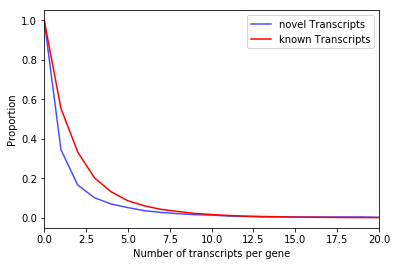

In [5]:
%pylab inline

pylab.plot(range(0,maxCountNovel-1,1), novelCountList, color="blue", alpha=0.7, label="novel Transcripts")
pylab.plot(range(0,maxCountAll-1,1), allCountList, color="red", label="known Transcripts")

pylab.xlim(0,20)
pylab.ylabel("Proportion"); pylab.xlabel("Number of transcripts per gene")
pylab.ylabel="Percentage"
pylab.legend()
pylab.savefig("images/3_transcriptCountDistribution", dpi=300)

In [6]:
print "percentages with atleast 2 transcripts"
print novelCountList[2]*100
print allCountList[2]*100


print "\npercentages with atleast 5 transcripts"
print novelCountList[5]*100
print allCountList[5]*100

print "\npercentages with atleast 10 transcripts"
print novelCountList[10]*100
print allCountList[10]*100

percentages with atleast 2 transcripts
16.6534496431
33.3663488919

percentages with atleast 5 transcripts
5.23394131642
8.69134579671

percentages with atleast 10 transcripts
1.42743854084
1.73331682555
